In [1]:
from helpers.transform import TrimAfterClicker
from helpers.plot import plot_wavelet_spectrogram

MOBILE_DIR = "data/mobile/test-clicker.mp4"
DIGITAL_DIR = "data/digital/test-clicker.wav"

tac = TrimAfterClicker()
tac

# Original

torch.Size([1, 1136640]) torch.Size([1, 60000])


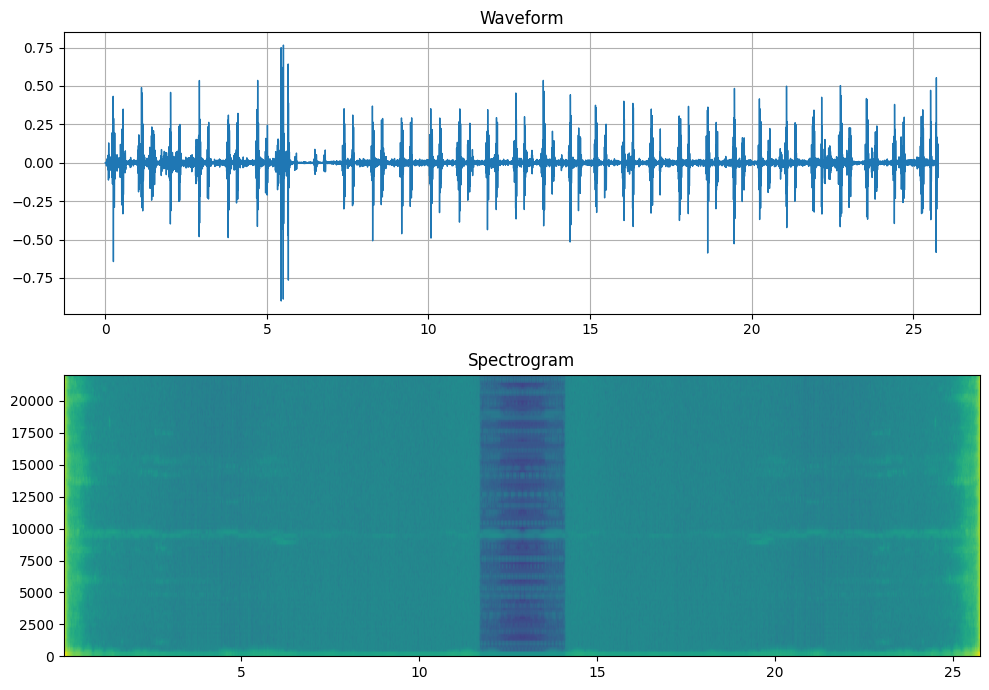

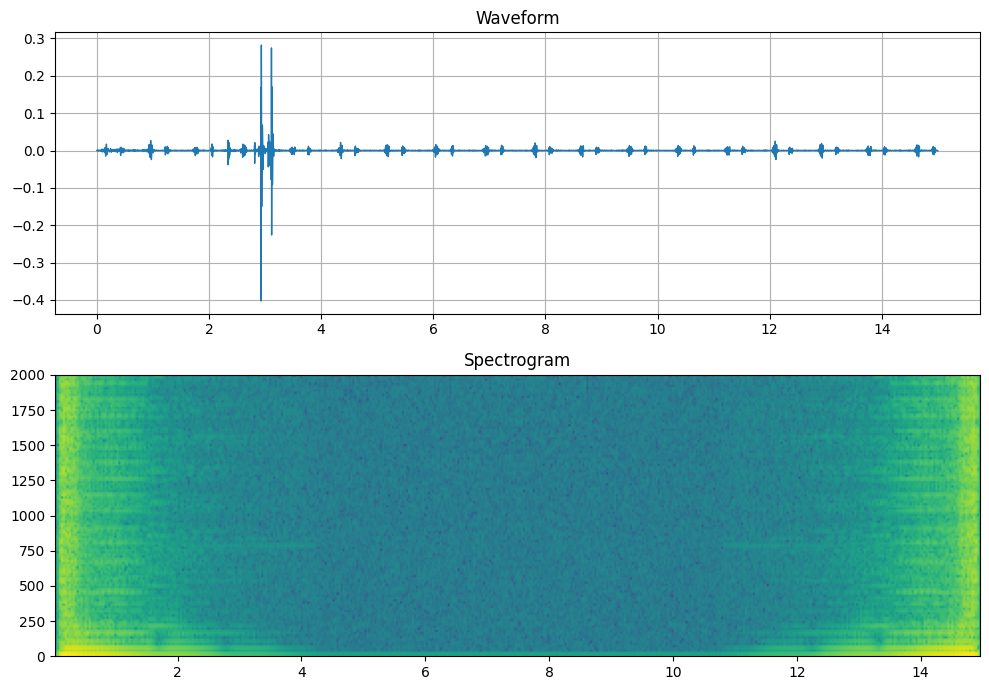

In [3]:
mobile, mobile_sample_rate = tac.load_audio(MOBILE_DIR)
digital, digital_sample_rate = tac.load_audio(DIGITAL_DIR)

print(mobile.shape, digital.shape)

plot_wavelet_spectrogram(mobile, mobile_sample_rate)
plot_wavelet_spectrogram(digital, digital_sample_rate)

# Trimmed after clicker

torch.Size([1, 884897]) torch.Size([1, 47358])


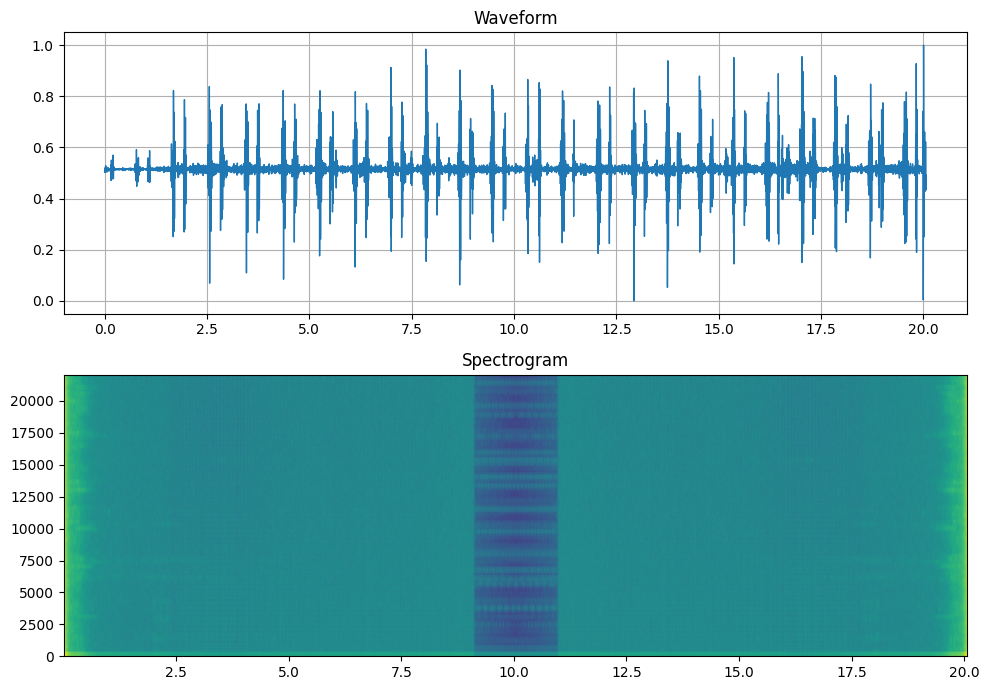

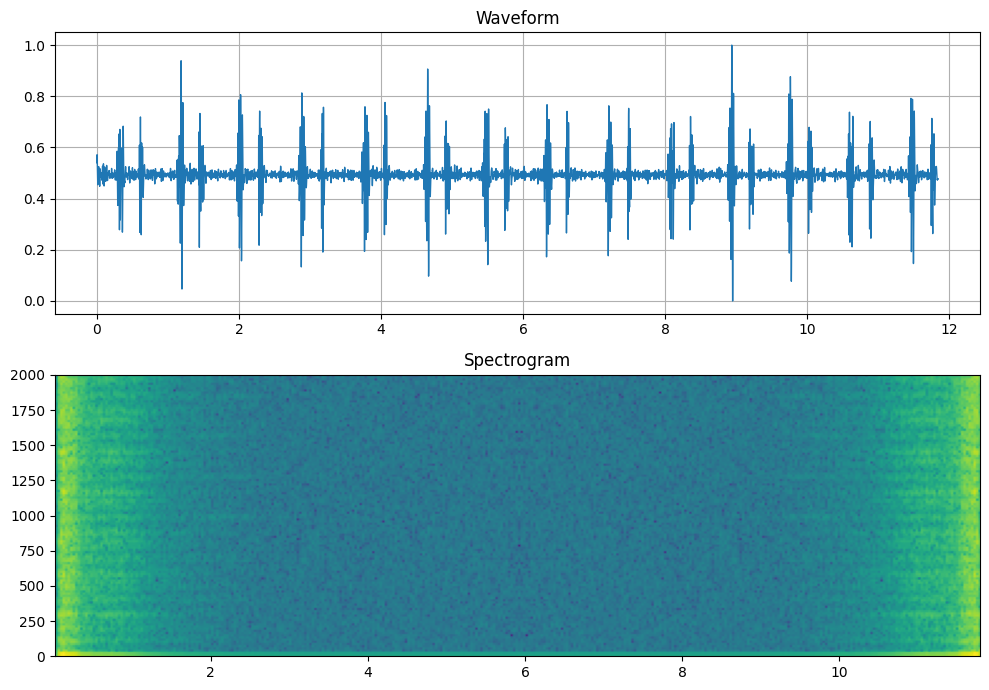

In [4]:
mobile, mobile_sample_rate = tac.transform(MOBILE_DIR)
digital, digital_sample_rate = tac.transform(DIGITAL_DIR)

print(mobile.shape, digital.shape)

plot_wavelet_spectrogram(mobile, mobile_sample_rate)
plot_wavelet_spectrogram(digital, digital_sample_rate)

# Align both to the same duration

torch.Size([1, 485100]) torch.Size([1, 44000])


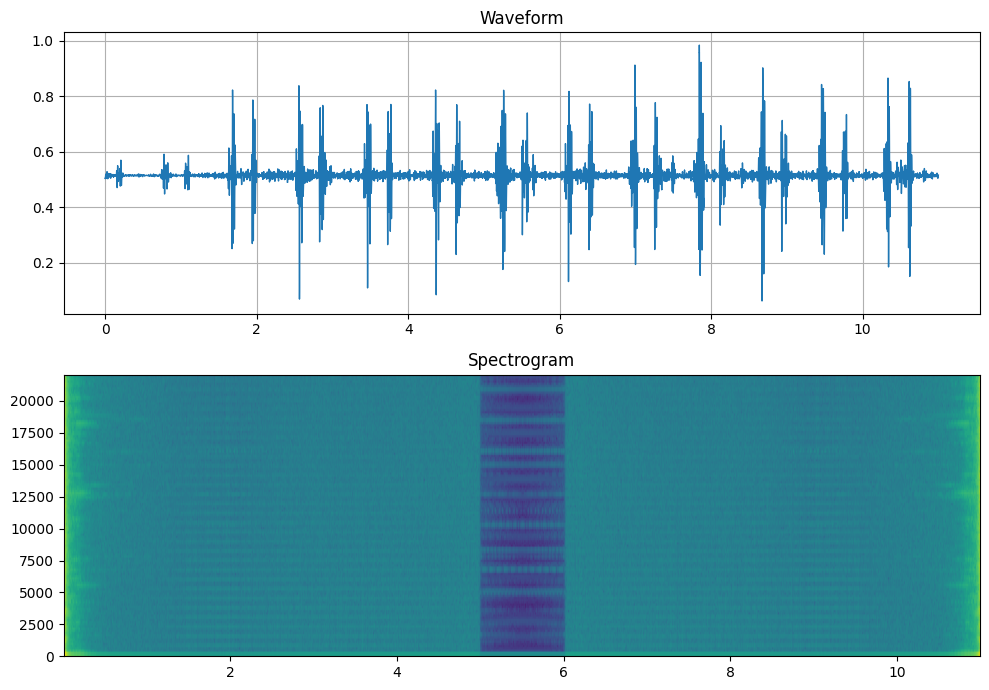

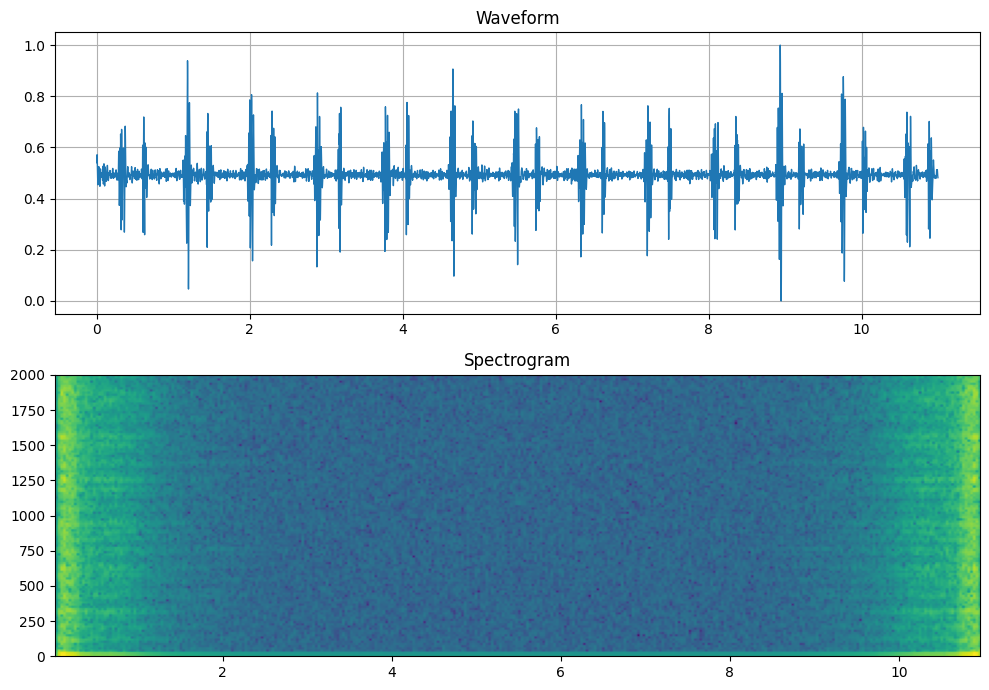

In [6]:
mobile, mobile_sample_rate, digital, digital_sample_rate = tac.align_audios(
    MOBILE_DIR, DIGITAL_DIR
)

print(mobile.shape, digital.shape)

plot_wavelet_spectrogram(mobile, mobile_sample_rate)
plot_wavelet_spectrogram(digital, digital_sample_rate)